
<h2> Analyst: Eben Jalyn Apolinario</h2>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import f_oneway

In [2]:
data = pd.read_csv('dataset\\Internet-Demographic.csv')                        

In [3]:
data

,Country Name,Country Code,Birth rate,Internet users,Income Group
0,Aruba,ABW,10.244,78.9,High income
1,Afghanistan,AFG,35.253,5.9,Low income
2,Angola,AGO,45.985,19.1,Upper middle income
3,Albania,ALB,12.877,57.2,Upper middle income
4,United Arab Emirates,ARE,11.044,88.0,High income
...,...,...,...,...,...
190,"Yemen, Rep.",YEM,32.947,20.0,Lower middle income
191,South Africa,ZAF,20.850,46.5,Upper middle income
192,"Congo, Dem. Rep.",COD,42.394,2.2,Low income
193,Zambia,ZMB,40.471,15.4,Lower middle income


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    195 non-null    object 
 1   Country Code    195 non-null    object 
 2   Birth rate      195 non-null    float64
 3   Internet users  195 non-null    float64
 4   Income Group    195 non-null    object 
dtypes: float64(2), object(3)
memory usage: 7.7+ KB


<h1> Data Cleansing </h1>

In [ ]:
data.isnull().sum()

<h1> Changing Data Types </h1>

In [ ]:
data.dtypes

In [ ]:
data['Country Name'] = data['Country Name'].astype('category')
data['Income Group'] = data['Income Group'].astype('category')


In [ ]:
data.dtypes

<h1>1 Distribution of Birth Rates </h1>
<h2> The plot shows the distribution of birth rate.  </h2>

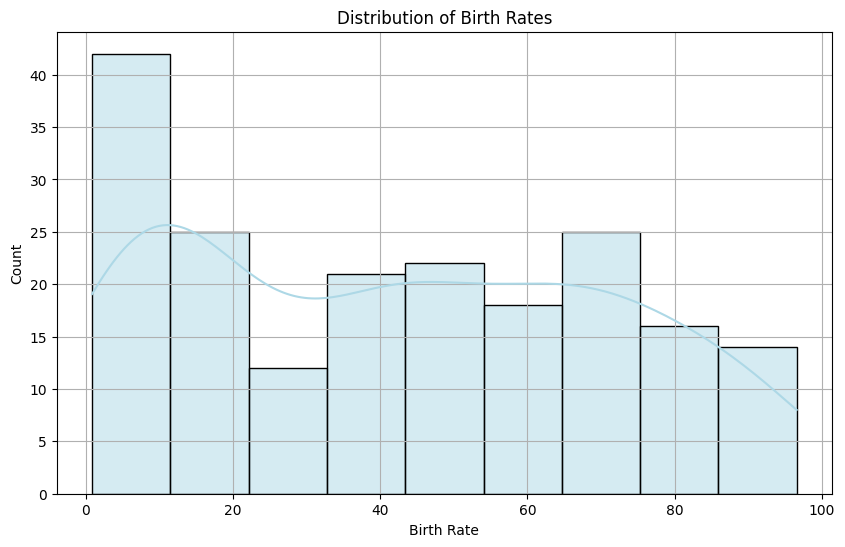

In [56]:
visual1 = data['Birth rate']
plt.figure(figsize=(10, 6))
plt.title('Distribution of Birth Rates')
plt.xlabel('Birth Rate')
plt.ylabel('Count')
plt.grid()
sns.histplot(visual4, kde=True, color="lightblue")
plt.show()

<h1>2 Top 5 Countries with the Highest Intemet Usage 
</h1
<h2> the top 5 countries are 84 Iceland, 
2  Bermud,

1   Norw, 4
    Swe, 36     Den with internet usagem6297</h2>>

In [ ]:
top_internet_users = data.nlargest(5, 'Internet users')[['Country Name', 'Internet users']]
print("Top 5 Countries with the Highest Internet Usage:")
print(top_internet_users)

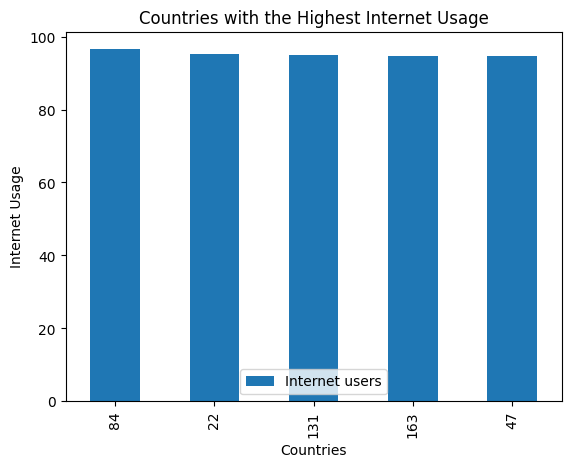

In [57]:
top_internet_users.plot(kind="bar")
plt.title('Countries with the Highest Internet Usage')
plt.xlabel('Countries')
plt.ylabel('Internet Usage')
plt.show()


<h1> 3 Count of Countries by Income Group </h1>
<h2> Most countries belong to high income.
There are 67 high income countries, 30 low income countries, 50 lower middle income countries, and 48 upper middle income countries</h2>

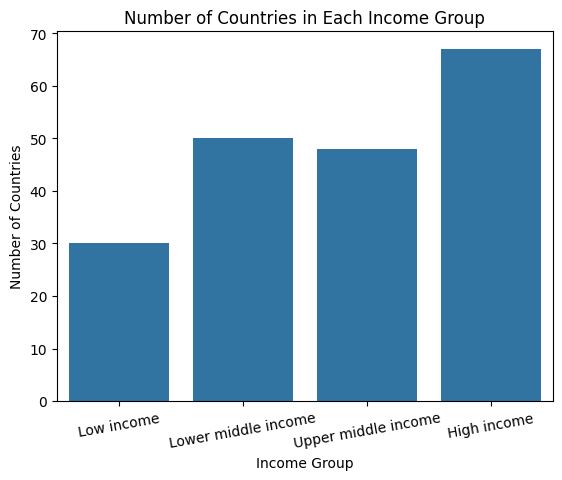

In [63]:
insight3 = {
    'Low income': 30,
    'Lower middle income': 50,
    'Upper middle income': 48,
    'High income': 67
}
sns.barplot(x=list(insight3.keys()), y=list(insight3.values()))
plt.title('Number of Countries in Each Income Group')
plt.xlabel('Income Group')
plt.ylabel('Number of Countries')
plt.xticks(rotation=10)
plt.show()

<h1>4 Box Plot of Iinternet Usage</h1>
<h2> this shows that internet user use it not above 70 percent and not below 15 percent</h2>

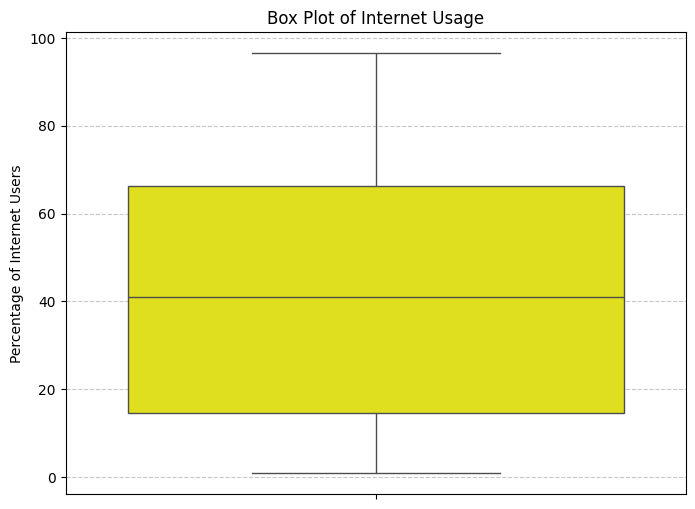

In [61]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['Internet users'], color="yellow")
plt.title("Box Plot of Internet Usage")
plt.ylabel("Percentage of Internet Users")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<h1>5 Countries with No Internet Access</h1>
<h2> All countries has a internet access</h2>

In [37]:
internet = data[data['Internet users'] == 0]
internet

,Country Name,Country Code,Birth rate,Internet users,Income Group


<h1> 6 Average Birth Rates</h1
<h2> The average birth rate of all countries is 21.47 </h2>>

In [62]:
visual6 = data.groupby(['Country Name'])['Birth rate'].mean()
print(f' The average birth rate of all countries is', visual6.mean())


 The average birth rate of all countries is 21.46992820512821


<h1>7 Scatter Plot: Birth Rate vs. Internet Usage</h1>
<h2> There is a strong negative correlation for birth rate and internet usage</h2>

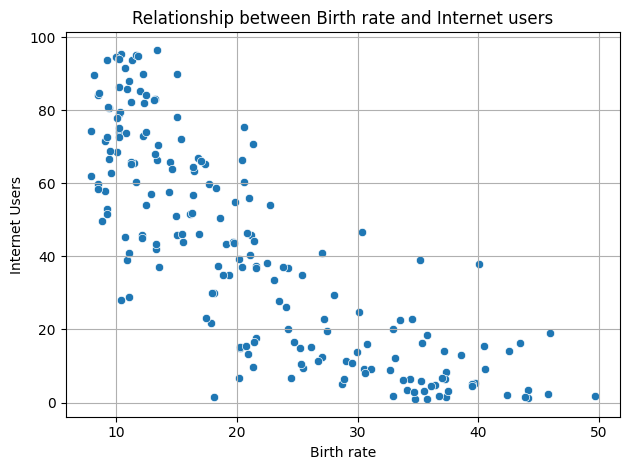

In [29]:
visual7 = data['Birth rate'].corr(data['Internet users'])

sns.scatterplot(x=data['Birth rate'], y=data['Internet users'])
plt.title('Relationship between Birth rate and Internet users')
plt.xlabel('Birth rate')
plt.ylabel('Internet Users')
plt.tight_layout()
plt.grid()
plt.show()

<h1>8 Countries with birthrate above 40</h1>

In [39]:
df = data[data['Birth rate'] > 40]
df

,Country Name,Country Code,Birth rate,Internet users,Income Group
2,Angola,AGO,45.985,19.1,Upper middle income
11,Burundi,BDI,44.151,1.3,Low income
14,Burkina Faso,BFA,40.551,9.1,Low income
65,"Gambia, The",GMB,42.525,14.0,Low income
115,Mali,MLI,44.138,3.5,Low income
127,Niger,NER,49.661,1.7,Low income
128,Nigeria,NGA,40.045,38.0,Lower middle income
156,Somalia,SOM,43.891,1.5,Low income
167,Chad,TCD,45.745,2.3,Low income
178,Uganda,UGA,43.474,16.2,Low income


<h1>9 Pie chart of income groups</h1>

([<matplotlib.patches.Wedge at 0x1d87ac443e0>,
 [Text(0.5190247300033398, 0.9698522205186522, 'High Income'),
  Text(-0.965639890441138, 0.5268202748460116, 'Low Income'),
  Text(-0.7746782472570677, -0.7809440525586436, 'Lower Middle Income'),
  Text(0.7871590001437189, -0.7683623549424717, 'Upper Middle Income')],
 [Text(0.28310439818363986, 0.5290103021010829, '34.4%'),
  Text(-0.5267126675133479, 0.2873565135523699, '15.4%'),
  Text(-0.4225517712311278, -0.4259694832138056, '25.6%'),
  Text(0.4293594546238466, -0.41910673905953, '24.6%')])

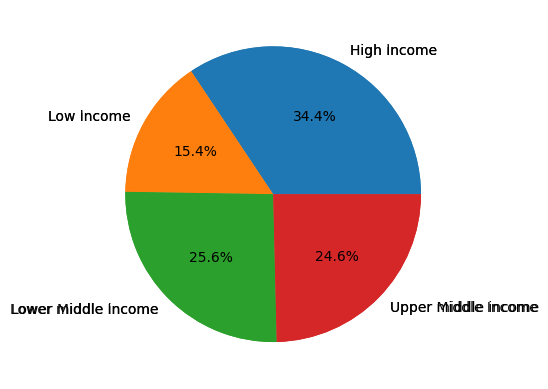

In [53]:
income = data.groupby('Income Group').size()
income

income.plot(kind='pie')

plt.pie(income, labels=['High Income','Low Income','Lower Middle Income','Upper Middle Income'],autopct='%1.1f%%')

In [54]:
income

Income Group
High income            67
Low income             30
Lower middle income    50
Upper middle income    48
dtype: int64

<h1>10 Correlation between Brith rate and Internet Usage</h1>
<h2> There is a strong negative correlation between the two variables</h2>

In [32]:
visual10 = data['Birth rate'].corr(data['Internet users']).sum()
visual10

-0.8155885551284763

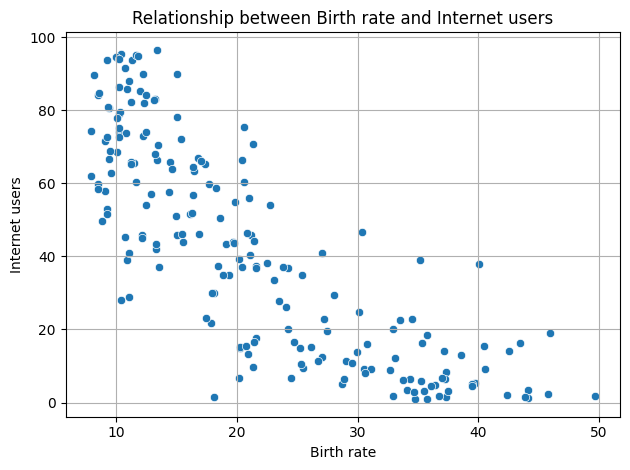

In [64]:
visual10 = data['Birth rate'].corr(data['Internet users']).sum()

sns.scatterplot(x=data['Birth rate'], y=data['Internet users'])
plt.title('Relationship between Birth rate and Internet users')
plt.xlabel('Birth rate')
plt.ylabel('Internet users')
plt.tight_layout()
plt.grid()
plt.show()